<img src="img/dsci511_header.png" width="600">

# Lecture 4: Plotting, Merging and Grouping

## Lecture Learning Objectives

- Make basic plots in Pandas by accessing the `.plot` attribute or importing functions from `pandas.plotting`.
- Combine dataframes using `df.merge()` and `pd.concat()` and know when to use these different methods.
- Apply functions to a dataframe or Series `DataFrame.apply()` and `DataFrame.applymap()` and `Series.map()`
- Perform grouping and aggregating operations using `df.groupby()` and `df.agg()`.
- Perform aggregating methods on grouped or ungrouped objects such as finding the minimum, maximum and sum of values in a dataframe using `df.agg()`.

In [1]:
import numpy as np
import pandas as pd

## Visualizing your data

You will study data visualization in depth in DSCI 531. However, it is good to know that pandas provides some basic plotting functionality-- you can use this to take a quick look at your data.

This feature of pandas is accessed via the `plot()` method. It uses the `matplotlib` library, which you can install with `conda install matplotlib` as you have done with other packages.

Once we have `matplotlib` installed, let's load in the dataset `'data/cycling_data.csv'` which includes some dates, times and comments about bike rides.

In [2]:
bike_df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True).dropna()
bike_df.head()

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


Let's go ahead and make a plot of the distances ridden.

<Axes: xlabel='Date'>

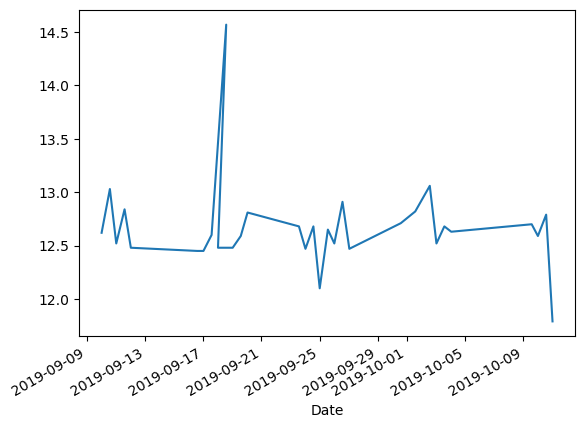

In [3]:
bike_df['Distance'].plot()

Notice the line graph joined adjacent points together, which may suggest there was a non-zero riding distance on (say) Sep 13 or Sep 21. But there are no biking entries for these days!

Plotting with pandas can be a good way to take a quick look at your data. It can also help you to spot potential problems. For example, let's make a graph of *cumulative* distance covered over time. 

<Axes: xlabel='Date'>

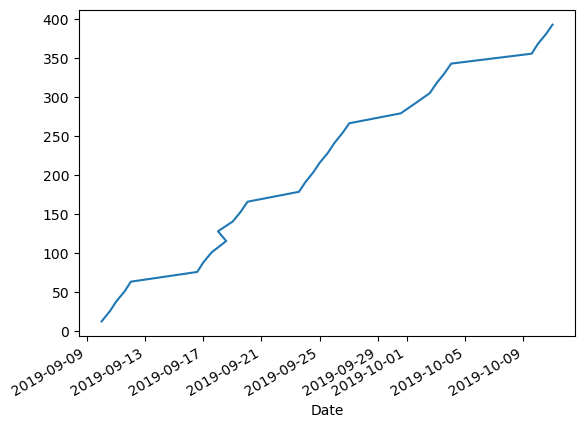

In [4]:
bike_df['Distance'].cumsum().plot()

That kink in the graph is funny... since we're plotting cumulative distance, the line should always be moving up and to the right! 

In [5]:
bike_df.loc['2019-09-18']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-18 13:49:53,Morning Ride,Ride,2903,14.57,Raining today
2019-09-18 00:15:52,Afternoon Ride,Ride,2101,12.48,Pumped up tires


Looks like some entries were out of chronological order. We should sort the index before plotting.

<Axes: xlabel='Date'>

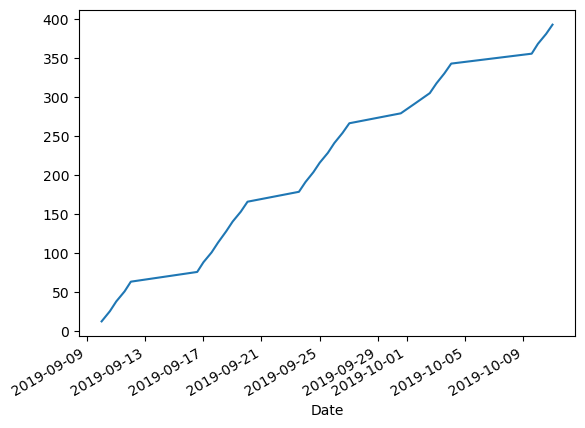

In [6]:
bike_df = bike_df.sort_index()
bike_df['Distance'].cumsum().plot()

That's better! We can also change plot parameters like colour and line thickness.

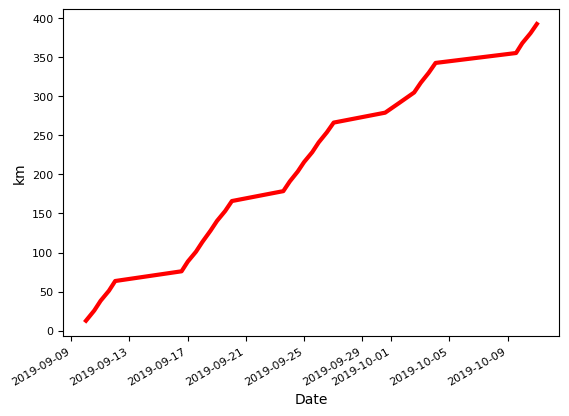

In [7]:
bike_df['Distance'].cumsum().plot.line(fontsize=8, linewidth=3, color='r', ylabel='km');

There are many other kinds of plots you can make:

|Method|Plot Type|
|---|---|
|`bar` or `barh` | bar plots|
|`hist` | histogram|
|`box` | boxplot|
|`kde` or `density` | density plots|
|`area` | area plots|
|`scatter` | scatter plots|
|`hexbin` | hexagonal bin plots|
|`pie` | pie plots|

Plus, there are more advanced plotting functions (scatter matrix, lag plots and others) that can be accessed via the `pandas.plotting` module.

## Combining multiple data frames

Sometimes we have meaningful data spread across different data frames (or read in from different files) that we wish to combine. There are many ways to combine data in pandas, and we will look at some of them today.

To begin let's load in some data frames with weather information for different dates. You might notice that these frames share information across certain rows or columns, i.e. the data sets are related.

In [8]:
w1 = pd.read_csv('data/weather1.csv', index_col=0)
w2 = pd.read_csv('data/weather2.csv', index_col=0)
w3 = pd.read_csv('data/weather3.csv', index_col=0)
w4 = pd.read_csv('data/weather4.csv', index_col=0)

In [9]:
w1 # Let's look at these Data Frames

,Date/Time,Year,Month,Mean Temp (°C)
0,Sep-12,2012,9,15.4
1,Oct-12,2012,10,10.5
2,Nov-12,2012,11,7.2
3,Dec-12,2012,12,4.4
4,Jan-13,2013,1,2.8


In [10]:
w2

,Date/Time,Year,Month,Mean Temp (°C)
5,Feb-13,2013,2,5.4
6,Mar-13,2013,3,7.2
7,Apr-13,2013,4,9.5
8,May-13,2013,5,13.3
9,Jun-13,2013,6,15.4


In [11]:
w3

,Total Rain (mm),Spd of Max Gust (km/h)
0,5.0,56
1,197.0,74
2,162.8,63
3,183.4,65
4,100.4,39


In [12]:
w4

,Date/Time,Year,Month,Spd of Max Gust (km/h)
2,Nov-12,2012,11,63
3,Dec-12,2012,12,65
7,Apr-13,2013,4,76
9,Jun-13,2013,6,44


### Combining with `pd.concat()`

The simplest way to combine Data Frames in pandas is to use `pd.concat()`, which concatenates them along a shared axis. The default is to concatenate rows:

In [13]:
pd.concat([w1,w2])

,Date/Time,Year,Month,Mean Temp (°C)
0,Sep-12,2012,9,15.4
1,Oct-12,2012,10,10.5
2,Nov-12,2012,11,7.2
3,Dec-12,2012,12,4.4
4,Jan-13,2013,1,2.8
5,Feb-13,2013,2,5.4
6,Mar-13,2013,3,7.2
7,Apr-13,2013,4,9.5
8,May-13,2013,5,13.3
9,Jun-13,2013,6,15.4


The above worked well since both Data Frames `w1` and `w2` have the same set of columns. Let's see what happens when we have a few different columns:

In [14]:
pd.concat([w1,w4])

,Date/Time,Year,Month,Mean Temp (°C),Spd of Max Gust (km/h)
0,Sep-12,2012,9,15.4,NaN
1,Oct-12,2012,10,10.5,NaN
2,Nov-12,2012,11,7.2,NaN
3,Dec-12,2012,12,4.4,NaN
4,Jan-13,2013,1,2.8,NaN
2,Nov-12,2012,11,NaN,63.0
3,Dec-12,2012,12,NaN,65.0
7,Apr-13,2013,4,NaN,76.0
9,Jun-13,2013,6,NaN,44.0


We get a new frame containing columns from both `w1` and `w4`. The common columns are concatenated, and missing data shows up as `NaN`. Notice that pandas did not know that the indices were 'common', i.e. indices 2 and 3 are repeated in the output.

Next, let's concatenate two Data Frames with shared rows but different columns:

In [15]:
pd.concat([w1,w3], axis = 1)

,Date/Time,Year,Month,Mean Temp (°C),Total Rain (mm),Spd of Max Gust (km/h)
0,Sep-12,2012,9,15.4,5.0,56
1,Oct-12,2012,10,10.5,197.0,74
2,Nov-12,2012,11,7.2,162.8,63
3,Dec-12,2012,12,4.4,183.4,65
4,Jan-13,2013,1,2.8,100.4,39


And again when only some rows are shared:

In [16]:
pd.concat([w1,w4], axis = 1)

,Date/Time,Year,Month,Mean Temp (°C),Date/Time,Year,Month,Spd of Max Gust (km/h)
0,Sep-12,2012.0,9.0,15.4,NaN,NaN,NaN,NaN
1,Oct-12,2012.0,10.0,10.5,NaN,NaN,NaN,NaN
2,Nov-12,2012.0,11.0,7.2,Nov-12,2012.0,11.0,63.0
3,Dec-12,2012.0,12.0,4.4,Dec-12,2012.0,12.0,65.0
4,Jan-13,2013.0,1.0,2.8,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Apr-13,2013.0,4.0,76.0
9,NaN,NaN,NaN,NaN,Jun-13,2013.0,6.0,44.0


This time pandas knew to use a shared index for rows, but the column indices were treated independently. As a result, we have "duplicate" columns in the output.

We can concatenate as many Data Frames as we want, but each call to `pd.concat` creates a new copy of the data frame. So instead of copying 'one-at-a-time', the best practice is to assemble all required Data Frames into a single list, and only call `pd.concat` once.

In [17]:
pd.concat([w1,w2,w3,w4])

,Date/Time,Year,Month,Mean Temp (°C),Total Rain (mm),Spd of Max Gust (km/h)
0,Sep-12,2012.0,9.0,15.4,NaN,NaN
1,Oct-12,2012.0,10.0,10.5,NaN,NaN
2,Nov-12,2012.0,11.0,7.2,NaN,NaN
3,Dec-12,2012.0,12.0,4.4,NaN,NaN
4,Jan-13,2013.0,1.0,2.8,NaN,NaN
5,Feb-13,2013.0,2.0,5.4,NaN,NaN
6,Mar-13,2013.0,3.0,7.2,NaN,NaN
7,Apr-13,2013.0,4.0,9.5,NaN,NaN
8,May-13,2013.0,5.0,13.3,NaN,NaN
9,Jun-13,2013.0,6.0,15.4,NaN,NaN


We were certainly able to "stick" our data frames together here, but we may not have gained the information we wanted. For example, the data frame above contains entries for both `Mean Temp` and `Total Rain` for November 12, 2012, but these are split across different rows.

If we know beforehand that shared dates should correspond to the same example in our data, it would be good to use this fact when combining the data frames. The next section discuss how to implement this in pandas.

### Combining with `pd.Merge`

Another pandas function that is useful for joining Data Frames together is `pd.merge`. This function implements SQL-style joins in pandas. You will learn more about SQL when you study databases in DSCI 513. `pd.merge()`.

When using `pd.concat()`, you have to do all the work beforehand to make sure the rows and/or columns line up just right for the concatenation to give the correct, meaningful result. This can be tricky when working with large Data Frames. With `pd.merge`, we can pass a little more meaningful information to pandas which it uses combine our Data Frames to get the result we intended. Essentially, the matching is done based on columns shared between the Data Frames.

In [18]:
pd.merge(w1, w4, how='outer', on = ['Date/Time', 'Month', 'Year'])

,Date/Time,Year,Month,Mean Temp (°C),Spd of Max Gust (km/h)
0,Apr-13,2013,4,NaN,76.0
1,Dec-12,2012,12,4.4,65.0
2,Jan-13,2013,1,2.8,NaN
3,Jun-13,2013,6,NaN,44.0
4,Nov-12,2012,11,7.2,63.0
5,Oct-12,2012,10,10.5,NaN
6,Sep-12,2012,9,15.4,NaN


This time, pandas knew that rows with matching Date/Time, Month and Year should count as the same observation for both frames. But notice that the index was ignored! The resulting Data Frame has an entirely new index, since we were matching on columns. Matching on the index is also possible.

In [19]:
pd.merge(w1, w4, how='outer', left_index = True, right_index = True)

,Date/Time_x,Year_x,Month_x,Mean Temp (°C),Date/Time_y,Year_y,Month_y,Spd of Max Gust (km/h)
0,Sep-12,2012.0,9.0,15.4,NaN,NaN,NaN,NaN
1,Oct-12,2012.0,10.0,10.5,NaN,NaN,NaN,NaN
2,Nov-12,2012.0,11.0,7.2,Nov-12,2012.0,11.0,63.0
3,Dec-12,2012.0,12.0,4.4,Dec-12,2012.0,12.0,65.0
4,Jan-13,2013.0,1.0,2.8,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Apr-13,2013.0,4.0,76.0
9,NaN,NaN,NaN,NaN,Jun-13,2013.0,6.0,44.0


The `how='outer'` parameter tells pandas to produce a Data Frame containing the full list of keys from both Data Frames. We could restrict this to keys in only one Data Frame:

In [20]:
pd.merge(left = w1, right = w4, how='right', on = ['Date/Time', 'Month', 'Year'])

,Date/Time,Year,Month,Mean Temp (°C),Spd of Max Gust (km/h)
0,Nov-12,2012,11,7.2,63
1,Dec-12,2012,12,4.4,65
2,Apr-13,2013,4,NaN,76
3,Jun-13,2013,6,NaN,44


Notice again that the index was not retained when matching on columns.

Let's create a Data Frame of 'seasons' to categorize the different months of the year.

In [21]:
seasons = pd.DataFrame({
                    'month':[1,2,3,4,5,6,7,8,9,10,11,12], 
                    'season': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
                       }
                      )

seasons

,month,season
0,1,Winter
1,2,Winter
2,3,Spring
3,4,Spring
4,5,Spring
5,6,Summer
6,7,Summer
7,8,Summer
8,9,Fall
9,10,Fall


We made this Data Frame "by hand", using a dictionary object. Dictionaries are another object type in Python, similar to lists but indexed based on "keys" that do not need to be integers. The keys in this case serve as column names when passed to `pd.DataFrame()`.

Now if we have some dataset that includes months as a column, we can merge with `seasons`. For example, we can use the following data set that we saw in Lecture 1 (we are dropping some columns):

In [22]:
weather = pd.read_csv('data/YVR_weather_data.csv').dropna(axis=1)
weather.head()

,Date/Time,Year,Month,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C)
0,Jan-37,1937,1,0.6,-8.1,-3.8,6.1,-16.1
1,Feb-37,1937,2,5.2,-1.3,2.0,10.0,-7.8
2,Mar-37,1937,3,11.7,2.9,7.3,17.2,-1.1
3,Apr-37,1937,4,11.9,4.8,8.4,16.1,1.1
4,May-37,1937,5,16.3,6.6,11.5,20.6,1.7



Let's attempt a left join for `weather` with `seasons`. We will have to tell pandas that `Month` in the left frame matches `month` in the second (note that the strings are not identical).

In [23]:
pd.merge(left = weather, right = seasons, how = 'left', left_on = 'Month', right_on = 'month')

,Date/Time,Year,Month,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),month,season
0,Jan-37,1937,1,0.6,-8.1,-3.8,6.1,-16.1,1,Winter
1,Feb-37,1937,2,5.2,-1.3,2.0,10.0,-7.8,2,Winter
2,Mar-37,1937,3,11.7,2.9,7.3,17.2,-1.1,3,Spring
3,Apr-37,1937,4,11.9,4.8,8.4,16.1,1.1,4,Spring
4,May-37,1937,5,16.3,6.6,11.5,20.6,1.7,5,Spring
...,...,...,...,...,...,...,...,...,...,...
912,Feb-13,2013,2,7.8,3.0,5.4,10.4,-1.1,2,Winter
913,Mar-13,2013,3,10.5,3.9,7.2,15.7,-0.7,3,Spring
914,Apr-13,2013,4,12.8,6.2,9.5,17.2,1.0,4,Spring
915,May-13,2013,5,17.1,9.5,13.3,22.2,2.5,5,Spring


With `pd.merge()`, we can combine data frames in a one-to-one, one-to-many or a many-to-many fashion, leading to a large range of possibilities. You will see many examples of joins in DSCI 513.

### Applying Custom Functions

There will be times when you want to apply a function that is not built-in to Pandas. For this, we also have methods:

* `df.apply()`, applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)

* `df.applymap()`, applies a function element-wise (for functions that accept/return single values at a time)
    
* `series.apply()`, same as above for Pandas `Series`.

* `series.map()`, also for Series, but optionally accepts a dictionary as input.

In [24]:
weather[['Month', 'Mean Temp (°C)']].apply(np.log) # we will see more from numpy in future lectures

,Month,Mean Temp (°C)
0,0.000000,NaN
1,0.693147,0.693147
2,1.098612,1.987874
3,1.386294,2.128232
4,1.609438,2.442347
...,...,...
912,0.693147,1.686399
913,1.098612,1.974081
914,1.386294,2.251292
915,1.609438,2.587764


In [25]:
weather['Mean Temp (°C)'].apply(int) # apply is a method for both Data Frames and Series

0      -3
1       2
2       7
3       8
4      11
       ..
912     5
913     7
914     9
915    13
916    15
Name: Mean Temp (°C), Length: 917, dtype: int64

We provide a dictionary as input to `Series.map`.

In [26]:
seasons['season'].map(
                        {'Winter':'Cold', 'Spring':'Not Cold', 'Summer': 'Warm'}
                     )

0         Cold
1         Cold
2     Not Cold
3     Not Cold
4     Not Cold
5         Warm
6         Warm
7         Warm
8          NaN
9          NaN
10         NaN
11        Cold
Name: season, dtype: object

Note that `'Fall'` did not appear as a key in the dictionary supplied, and the output shows `NaN` for the corresponding entries.

### Grouping

Often we are interested in examining specific groups in our data. In pandas, `df.groupby()` allows us to group our data based on one or more variables. It is analgous to the `group_by` function in R

In [27]:
imdb = pd.read_csv('data/imdb.csv')
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


Let's group this Data Frame on `Released_Year`:

In [28]:
imdb.groupby(by = 'Released_Year')

What is a `DataFrameGroupBy` object? It's really just a dictionary of index-mappings! The keys represent the different groups, and each key is mapped to a list of indices corresponding to that group. We can look at them directly if we really wanted to:

In [29]:
imdb.groupby(by = 'Released_Year').groups

{1920: [321], 1921: [127], 1922: [568], 1924: [194], 1925: [193, 462], 1926: [320], 1927: [126, 319], 1928: [317, 318], 1930: [461], 1931: [52, 125, 719], 1932: [567, 718], 1933: [566, 717, 876], 1934: [316, 460], 1935: [565, 716, 999], 1936: [51], 1937: [315], 1938: [564, 714, 715], 1939: [313, 314, 458, 459, 713], 1940: [83, 311, 312, 457, 562, 563, 875], 1941: [124, 456], 1942: [50, 192, 455], 1943: [712], 1944: [123, 453, 711, 998], 1945: [452, 561], 1946: [32, 454, 559, 560, 874], 1947: [451, 558], 1948: [122, 191, 310, 450, 709, 710], 1949: [308, 309, 449], 1950: [82, 189, 190, 448, 557], 1951: [307, 447, 556, 872, 873], 1952: [120, 121, 555, 871], 1953: [188, 306, 445, 446, 997], 1954: [31, 81, 187, 305, 443, 870], 1955: [186, 442, 444, 554, 868, 869], 1956: [441, 552, 553, 867, 996], 1957: [4, 79, 80, 184, 185, 302, 303, 304, 440], 1958: [119, 301, 438, 439], 1959: [118, 183, 299, 300, 436, 437, 551], 1960: [49, 117, 297, 298, 435, 549, 550, 708, 864, 865, 866], 1961: [181, 182

We can access a specific group using the `get_group()` method.

In [30]:
imdb.groupby(by='Released_Year').get_group(1995)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
27,Se7en,1995,A,127 min,"Crime, Drama, Mystery",8.6,65.0,David Fincher,Morgan Freeman,Brad Pitt,Kevin Spacey,Andrew Kevin Walker,1445096,100125643.0
41,The Usual Suspects,1995,A,106 min,"Crime, Mystery, Thriller",8.5,77.0,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin,991208,23341568.0
101,Toy Story,1995,U,81 min,"Animation, Adventure, Comedy",8.3,95.0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,887429,191796233.0
102,Braveheart,1995,A,178 min,"Biography, Drama, History",8.3,68.0,Mel Gibson,Mel Gibson,Sophie Marceau,Patrick McGoohan,Angus Macfadyen,959181,75600000.0
164,Heat,1995,A,170 min,"Crime, Drama, Thriller",8.2,76.0,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight,577113,67436818.0
165,Casino,1995,A,178 min,"Crime, Drama",8.2,73.0,Martin Scorsese,Robert De Niro,Sharon Stone,Joe Pesci,James Woods,466276,42438300.0
256,Underground,1995,NaN,170 min,"Comedy, Drama, War",8.1,NaN,Emir Kusturica,Predrag 'Miki' Manojlovic,Lazar Ristovski,Mirjana Jokovic,Slavko Stimac,55220,171082.0
257,La haine,1995,UA,98 min,"Crime, Drama",8.1,NaN,Mathieu Kassovitz,Vincent Cassel,Hubert Koundé,Saïd Taghmaoui,Abdel Ahmed Ghili,150345,309811.0
258,Dilwale Dulhania Le Jayenge,1995,U,189 min,"Drama, Romance",8.1,NaN,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Farida Jalal,63516,NaN
259,Before Sunrise,1995,R,101 min,"Drama, Romance",8.1,77.0,Richard Linklater,Ethan Hawke,Julie Delpy,Andrea Eckert,Hanno Pöschl,272291,5535405.0


The usual thing to do, however, is to apply aggregation functions to the `groupby` object. For example, we could take the mean of the numeric columns. Use `numeric_only=True` to tell pandas to ignore non-numeric columns.

In [31]:
imdb.groupby(by='Released_Year').mean(numeric_only=True)

,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,,,,
1920,8.100000,NaN,5.742800e+04,NaN
1921,8.300000,NaN,1.133140e+05,5450000.0
1922,7.900000,NaN,8.879400e+04,NaN
1924,8.200000,NaN,4.198500e+04,977375.0
1925,8.100000,97.000000,7.705350e+04,2750485.0
...,...,...,...,...
2017,7.890909,79.473684,2.586361e+05,103065642.6
2018,7.994737,77.692308,2.195192e+05,186268383.0
2019,7.995652,76.904762,2.601555e+05,150421418.0


Even better would be to select the numeric columns ahead of time, and then call `grouby()` and `mean()`. We can apply multiple functions using `aggregate()`.

In [32]:
(
    imdb
    .loc[:, ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']]
    .groupby(by='Released_Year')
    .aggregate(['mean', 'sum', 'count'])
)

IMDB_Rating              Meta_score                 No_of_Votes  \
                     mean    sum count       mean     sum count          mean   
Released_Year                                                                   
1920             8.100000    8.1     1        NaN     0.0     0  5.742800e+04   
1921             8.300000    8.3     1        NaN     0.0     0  1.133140e+05   
1922             7.900000    7.9     1        NaN     0.0     0  8.879400e+04   
1924             8.200000    8.2     1        NaN     0.0     0  4.198500e+04   
1925             8.100000   16.2     2  97.000000    97.0     1  7.705350e+04   
...                   ...    ...   ...        ...     ...   ...           ...   
2017             7.890909  173.6    22  79.473684  1510.0    19  2.586361e+05   
2018             7.994737  151.9    19  77.692308  1010.0    13  2.195192e+05   
2019             7.995652  183.9    23  76.904762  1615.0    21  2.601555e+05   
2020             8.133333   48.8     6  82.750000   331.0     4  8.412700e+04   
3010             8.800000    8.8     1  74.000000    74.0     1  2.067042e+06   

                              
                   sum count  
Released_Year                 
1920             57428     1  
1921            113314     1  
1922             88794     1  
1924             41985     1  
1925            154107     2  
...                ...   ...  
2017           5689995    22  
2018           4170864    19  
2019           5983576    23  
2020            504762     6  
3010           2067042     1  

[100 rows x 9 columns]

We could also apply different functions to different columns.

In [33]:
imdb.groupby(by="Released_Year").agg(
    {
        "Meta_score": ["max", "min", "mean"],
        "Gross": ["sum"]
    }
)

Meta_score                          Gross
                     max   min       mean           sum
Released_Year                                          
1920                 NaN   NaN        NaN  0.000000e+00
1921                 NaN   NaN        NaN  5.450000e+06
1922                 NaN   NaN        NaN  0.000000e+00
1924                 NaN   NaN        NaN  9.773750e+05
1925                97.0  97.0  97.000000  5.500970e+06
...                  ...   ...        ...           ...
2017                94.0  60.0  79.473684  2.061313e+09
2018                96.0  49.0  77.692308  2.607757e+09
2019                96.0  51.0  76.904762  2.406743e+09
2020                90.0  77.0  82.750000  0.000000e+00
3010                74.0  74.0  74.000000  2.925762e+08

[100 rows x 4 columns]

Later on, we will learn how to write our own Python functions. Such 'custom' functions can also be passed to `aggregate()`.

Note that we can pass multiple columns to `groupby()`. The groups will be indexed based on all combinations of entries that appear in the listed columns

In [34]:
imdb.groupby(by=["Released_Year", "Certificate"]).agg(
    {
        "Meta_score": ["mean"],
        "Gross": ["sum"]
    }
)

Meta_score        Gross
                                mean          sum
Released_Year Certificate                        
1921          Passed             NaN    5450000.0
1924          Passed             NaN     977375.0
1925          Passed             NaN    5450000.0
1926          Passed             NaN    1033895.0
1927          Passed             NaN     539540.0
...                              ...          ...
2020          PG-13             90.0          0.0
              R                 77.0          0.0
              U                 83.0          0.0
              UA                 NaN          0.0
3010          UA                74.0  292576195.0

[330 rows x 2 columns]

Finally, you can `aggregate()` on a non-grouped data frame as well. This is essentially what `DataFrame.describe()` does under the hood.

In [35]:
(
    imdb
    .loc[:, ['IMDB_Rating', 'Meta_score', 'No_of_Votes']]
    .agg(['mean', 'min', 'count'])
)

,IMDB_Rating,Meta_score,No_of_Votes
mean,7.9493,77.97153,273692.911
min,7.6000,28.00000,25088.000
count,1000.0000,843.00000,1000.000
